<a href="https://colab.research.google.com/github/Priyankaverma2024/Capstone-project-2_sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



In [2]:
train_df = pd.read_csv("/content/train_data.csv")
train_df.head(10)

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive
5,"Kindle E-reader - White, 6 Glare-Free Touchscr...",Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",2016-12-23T00:00:00.000Z,This is a great product. Light weight. I wish ...,You will love it,Positive
6,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-05-31T00:00:00.000Z,My 7-year old daughter saved up to by this. He...,OK For Entry Level Tablet,Neutral
7,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-06-05T00:00:00.000Z,Purchased this for my son. Has room to upgrade...,Great for kids or smaller needs,Positive
8,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-11-23T00:00:00.000Z,Bought this for my mom and it was just what sh...,Great tablet,Positive
9,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-05-18T00:00:00.000Z,"was cheap, can not run chrome stuff, returned ...","was cheap, can not run chrome stuff, returned",Negative


In [4]:
train_df.tail()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
3995,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2017-12-08T00:00:00.000Z,"It‚Äôs fun for the family to play with, but it...",Fun toy,Positive
3996,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-03-31T00:00:00.000Z,"I love the Kindle, it is a great product. It r...",Great Product,Positive
3997,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,2017-01-19T00:00:00.000Z,I was looking for a blutooth speaker to use wi...,"Great ""dumb"" speaker",Positive
3998,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2016-05-27T00:00:00.000Z,This is the second Amazon Fire 7 tablet I have...,A great 7 inch tablet at a great price,Positive
3999,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-30T00:00:00.000Z,"very satisfied with tablet, very fast and effi...",Gets the job done,Positive


In [5]:
train_df.shape

(4000, 8)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  4000 non-null   object
 1   Product Brand        4000 non-null   object
 2   categories           4000 non-null   object
 3   primaryCategories    4000 non-null   object
 4   reviews.date         4000 non-null   object
 5   reviews.text         4000 non-null   object
 6   reviews.title        3990 non-null   object
 7   sentiment            4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [7]:
missing_values = train_df.isnull().sum()
print(missing_values)

Name of the product     0
Product Brand           0
categories              0
primaryCategories       0
reviews.date            0
reviews.text            0
reviews.title          10
sentiment               0
dtype: int64


✅ Handling reviews.title Null Values
  fill with

In [8]:
# Fill with empty string
train_df['reviews.title'].fillna('',inplace=True)


# Analyze Text Lengths


In [9]:
train_df['text_length'] = train_df['reviews.text'].apply(lambda x: len(str(x).split()))
print(train_df['text_length'].describe())


count    4000.000000
mean       30.567500
std        40.813385
min         1.000000
25%        14.000000
50%        21.000000
75%        35.000000
max      1539.000000
Name: text_length, dtype: float64


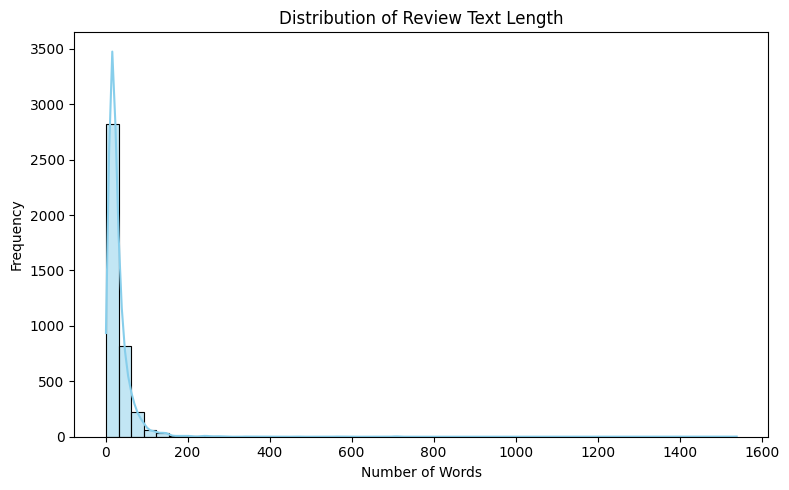

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(train_df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [11]:
# Sentiment distribution
print("Sentiment Distribution:")
print(train_df['sentiment'].value_counts())

Sentiment Distribution:
sentiment
Positive    3749
Neutral      158
Negative      93
Name: count, dtype: int64


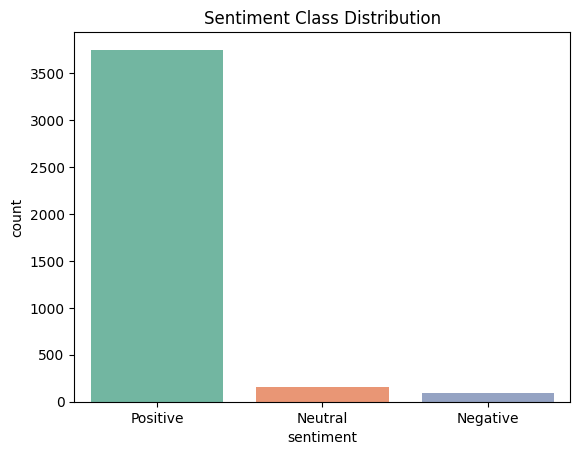

In [12]:
# Visualize our dataset
sns.countplot(data=train_df,x='sentiment',palette='Set2')
plt.title("Sentiment Class Distribution")
plt.show()

#🔍 Sentiment Distribution in Training Data
Positive: (3749)93.7%

Neutral: (158)4.0%

Negative: (93)2.3%

This is a highly imbalanced dataset — we'll definitely need to address this using techniques like SMOTE

#🧹 Text Cleaning + Word Cloud Creation

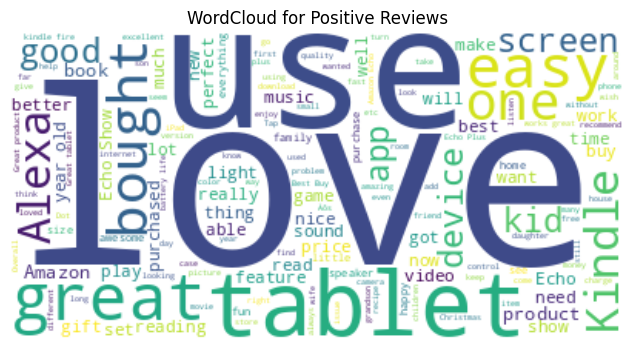

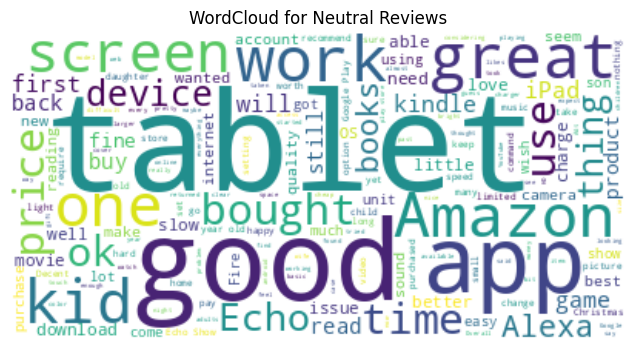

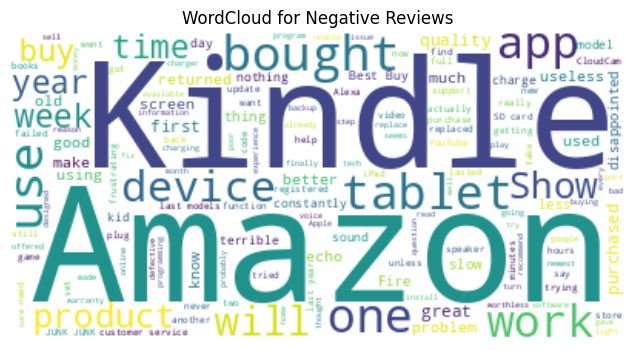

In [19]:
for sentiment in train_df['sentiment'].unique():
    text = " ".join(train_df[train_df['sentiment'] == sentiment]['reviews.text'].dropna())
    wc = WordCloud(background_color='white', max_words=2000).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()

In [20]:
# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


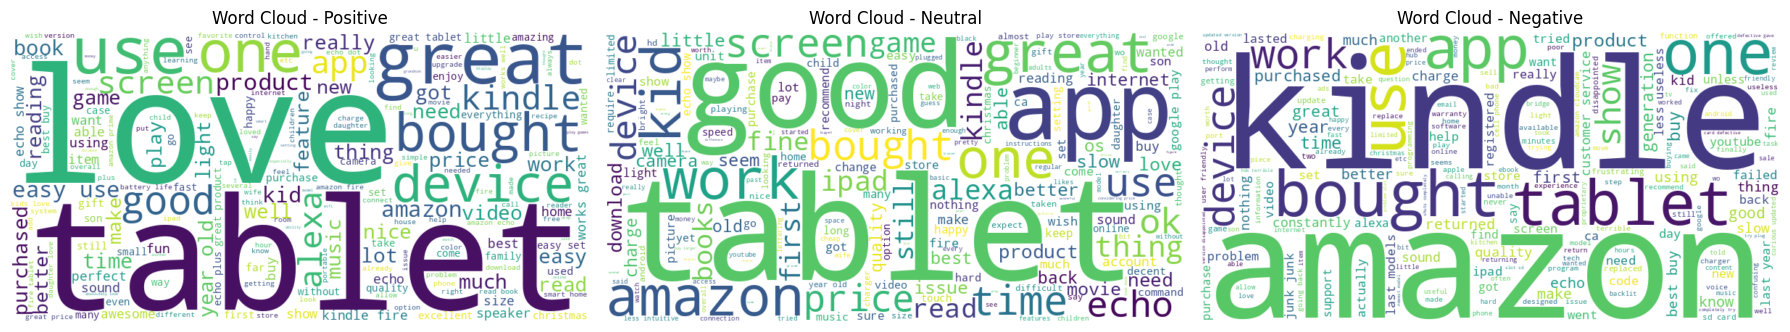

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import string
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    words = word_tokenize(str(text).lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return " ".join(words)

# Apply cleaning
train_df['cleaned_text'] = train_df['reviews.text'].apply(clean_text)

# Create Word Clouds
plt.figure(figsize=(18, 6))
for i, sentiment in enumerate(train_df['sentiment'].unique(), 1):
    text = " ".join(train_df[train_df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.subplot(1, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment}")
plt.tight_layout()
plt.show()


# 🧹 Text Preprocessing Pipeline
Lemmatization (reduces words to base form)

TF-IDF Vectorization (to convert text to numerical)

Target Encoding for the sentiment column (label encode)



In [22]:
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import pickle


In [23]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
  words = nltk.word_tokenize(text)
  lem_words = [lemmatizer.lemmatize(word)for word in words]
  return " ".join(lem_words)

# Apply Lemmatization
train_df['lemmatized_text']=train_df['cleaned_text'].apply(lemmatize_text)

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X = tfidf.fit_transform(train_df['lemmatized_text'])

# Encode target
#from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y = label_enc.fit_transform(train_df['sentiment'])

# Save the vectorizer and label encoder
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_enc, f)


# Split Data + Handle imbalance



*   Train-tes split
*   Use SMOTE to balance
*   Train models



In [24]:
#from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
#import seaborn as sns
#import matplotlib.pyplot as plt
#import pickle

# Step 1: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# Model Training & Evaluation

In [25]:
def train_evaluate_model(model, model_name):
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_val)

    # Evaluation
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_val, y_pred))

    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save model
    with open(f'{model_name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)


# Train All Models


NaiveBayes - Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.42      0.38        19
           1       0.20      0.45      0.28        31
           2       0.97      0.91      0.94       750

    accuracy                           0.88       800
   macro avg       0.51      0.60      0.53       800
weighted avg       0.92      0.88      0.90       800



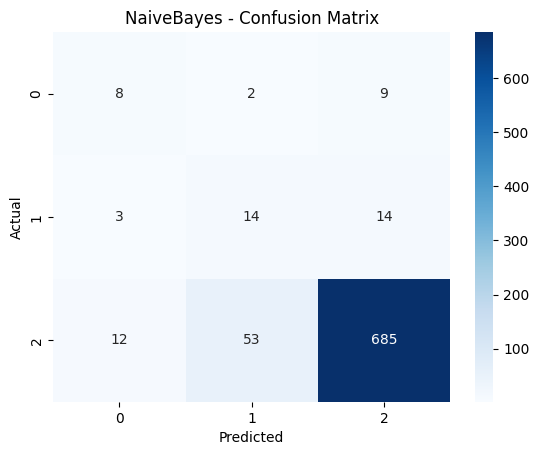


SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.16      0.24        19
           1       0.47      0.29      0.36        31
           2       0.95      0.99      0.97       750

    accuracy                           0.94       800
   macro avg       0.64      0.48      0.52       800
weighted avg       0.92      0.94      0.93       800



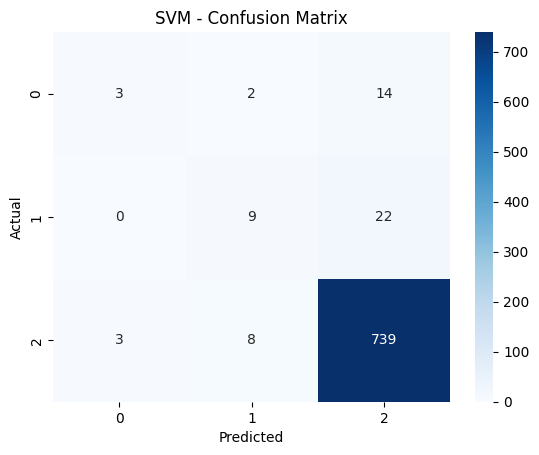


MLP - Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.16      0.24        19
           1       0.50      0.23      0.31        31
           2       0.95      0.99      0.97       750

    accuracy                           0.94       800
   macro avg       0.65      0.46      0.51       800
weighted avg       0.92      0.94      0.93       800



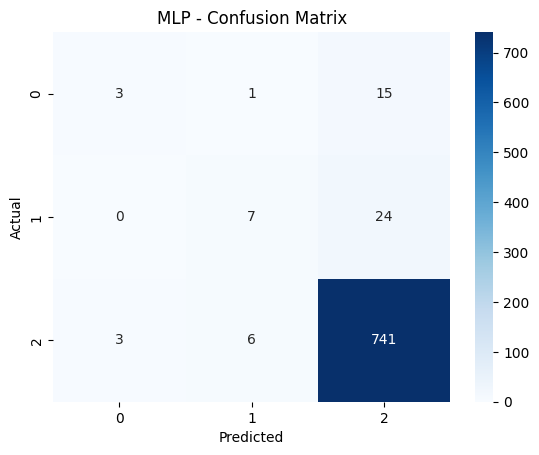


XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.21      0.30        19
           1       0.35      0.23      0.27        31
           2       0.96      0.99      0.97       750

    accuracy                           0.94       800
   macro avg       0.60      0.47      0.51       800
weighted avg       0.92      0.94      0.93       800



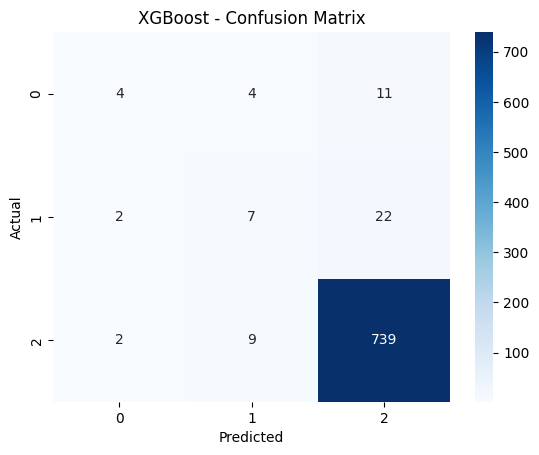

In [26]:
# Naive Bayes
nb = MultinomialNB()
train_evaluate_model(nb, "NaiveBayes")

# SVM
svm = LinearSVC()
train_evaluate_model(svm, "SVM")

# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
train_evaluate_model(mlp, "MLP")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_evaluate_model(xgb, "XGBoost")


# load test data for finall prediction using our best model

In [27]:
test_df = pd.read_csv("/content/test_data (1).csv")
test_df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [28]:
test_df.shape

(1000, 7)

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [30]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(str(text).lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(words)

# Apply cleaning
test_df['cleaned_text'] = test_df['reviews.text'].apply(clean_text)

# Lemmatization
def lemmatize_text(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in tokens])

test_df['lemmatized_text'] = test_df['cleaned_text'].apply(lemmatize_text)

In [31]:
# Load vectorizer and encoder
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_enc = pickle.load(f)

# Transform text using fitted TF-IDF
X_test = tfidf.transform(test_df['lemmatized_text'])

# Encode test sentiment
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#y_test = label_encoder.transform(test_df['sentiment'])


 # Step-by-Step Evaluation on test_data.csv

In [32]:
import pickle
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

# Binarize the test labels for ROC-AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust if your encoder has different classes

# List of saved models
model_files = {
    "NaiveBayes": "NaiveBayes_model.pkl",
    "SVM": "SVM_model.pkl",
    "MLP": "MLP_model.pkl",
    "XGBoost": "XGBoost_model.pkl"
}

# Evaluate each model
for model_name, file_name in model_files.items():
    print(f"\n===== {model_name} Evaluation on test_data.csv =====")

    # Load model
    with open(file_name, 'rb') as f:
        model = pickle.load(f)

    # Predict
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC-AUC Score (only if model supports probability prediction)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
        print(f"ROC-AUC Score: {roc_auc:.4f}")
    else:
        print("ROC-AUC not available for this model (no predict_proba).")


NameError: name 'y_test' is not defined

# ❗ We cannot define y_test or evaluate metrics like:
classification_report

confusion_matrix

roc_auc_score

Because these all require true labels, which are missing in this case.

#💡 Key Steps for LSTM
Text Preprocessing for LSTM (tokenization, padding)

Prepare Labels (one-hot encoding)

Define LSTM model

Train and evaluate

Save the model

✅ Step 1: Text Tokenization + Padding

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Tokenize lemmatized text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['lemmatized_text'])

sequences = tokenizer.texts_to_sequences(train_df['lemmatized_text'])
X_seq = pad_sequences(sequences, maxlen=200)

# One-hot encode the target
y_categorical = to_categorical(y)

# Train-test split
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(
    X_seq, y_categorical, test_size=0.2, stratify=y, random_state=42
)


# ✅ Step 2: Define & Train LSTM

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model_lstm.add(LSTM(128, return_sequences=False))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(3, activation='softmax'))  # 3 classes

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_lstm.fit(X_train_seq, y_train_seq, epochs=5, batch_size=64, validation_data=(X_val_seq, y_val_seq))


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9011 - loss: 0.5095 - val_accuracy: 0.9375 - val_loss: 0.2716
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9369 - loss: 0.2750 - val_accuracy: 0.9375 - val_loss: 0.2565
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9374 - loss: 0.2293 - val_accuracy: 0.9375 - val_loss: 0.2405
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9500 - loss: 0.1266 - val_accuracy: 0.9388 - val_loss: 0.2674
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9758 - loss: 0.0796 - val_accuracy: 0.9250 - val_loss: 0.3011


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
LSTM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.21      0.16      0.18        31
           2       0.95      0.98      0.96       750

    accuracy                           0.93       800
   macro avg       0.72      0.40      0.41       800
weighted avg       0.92      0.93      0.91       800



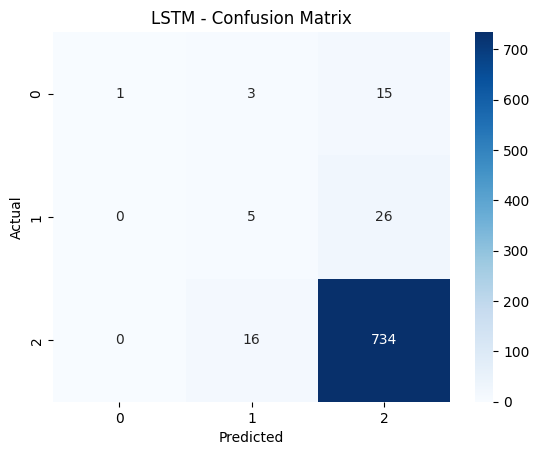

In [35]:
#import numpy as np
#from sklearn.metrics import classification_report, confusion_matrix
#import seaborn as sns
#import matplotlib.pyplot as plt

# Predictions
y_pred_seq = model_lstm.predict(X_val_seq)
y_pred_labels = np.argmax(y_pred_seq, axis=1)
y_val_labels = np.argmax(y_val_seq, axis=1)

# Report and Confusion Matrix
print("LSTM - Classification Report:")
print(classification_report(y_val_labels, y_pred_labels))

cm = confusion_matrix(y_val_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save LSTM model
model_lstm.save("lstm_model.h5")


# Perform RandomizedSearchCV tuning on all five models:

✅ Multinomial Naive Bayes
✅ SVM
✅ MLPClassifier
✅ XGBoost
✅ LSTM (with Keras Tuner)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.naive_bayes import MultinomialNB

# Define hyperparameter space
nb_params = {
    'alpha': np.linspace(0.1, 1.5, 15)
}

nb_model = MultinomialNB()
nb_search = RandomizedSearchCV(nb_model, nb_params, n_iter=10, scoring='f1_weighted', cv=5, random_state=42, n_jobs=-1)
nb_search.fit(X_train_res, y_train_res)

print("Best Parameters (Naive Bayes):", nb_search.best_params_)
best_nb = nb_search.best_estimator_


Best Parameters (Naive Bayes): {'alpha': np.float64(0.1)}


In [38]:
from sklearn.svm import SVC
#from sklearn.model_selection import RandomizedSearchCV

# Reduced search space
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],  # Try only linear for speed
    'gamma': ['scale']     # Keep default
}

svm_model = SVC(probability=True, random_state=42)

svm_search = RandomizedSearchCV(
    svm_model,
    svm_params,
    n_iter=5,              # Fewer combinations
    scoring='f1_weighted',
    cv=3,                  # Fewer folds
    random_state=42,
    n_jobs=-1              # Use all cores
)

svm_search.fit(X_train_res, y_train_res)

print("✅ Best Parameters (SVM):", svm_search.best_params_)
best_svm = svm_search.best_estimator_


✅ Best Parameters (SVM): {'kernel': 'linear', 'gamma': 'scale', 'C': 10}


In [39]:
from sklearn.neural_network import MLPClassifier

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

mlp_model = MLPClassifier(max_iter=300)
mlp_search = RandomizedSearchCV(mlp_model, mlp_params, n_iter=10, scoring='f1_weighted', cv=5, random_state=42, n_jobs=-1)
mlp_search.fit(X_train_res, y_train_res)

print("Best Parameters (MLP):", mlp_search.best_params_)
best_mlp = mlp_search.best_estimator_


Best Parameters (MLP): {'solver': 'adam', 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}


In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {
    'n_estimators': [100, 150],         # Reduced range
    'max_depth': [3, 5],                # Less deep trees
    'learning_rate': [0.05, 0.1],       # Safe range
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    verbosity=0,
    tree_method='hist'  # ⚡ much faster than exact for large data
)

xgb_search = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=5,               # 🔁 Reduced for speed
    scoring='f1_weighted',
    cv=3,                   # 3-fold CV
    random_state=42,
    n_jobs=-1
)

xgb_search.fit(X_train_res, y_train_res)

print("Best Parameters (XGBoost):", xgb_search.best_params_)
best_xgb = xgb_search.best_estimator_


Best Parameters (XGBoost): {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


🧾 Steps to Predict on hidden_test.csv
We’ll follow this flow:

✅ 1. Preprocess the hidden test data
Clean and lemmatize the review text

Apply same TF-IDF vectorizer or tokenizer used earlier

✅ 2. Load our best model
 XGBoost turned out best model for next steps.

✅ 3. Predict and generate output
Predicted labels

Output file: hidden_test_predictions.csv

# Step 1: Preprocess Hidden Test

In [51]:
# Load hidden test
import re
hidden_test = pd.read_csv("/content/test_data_hidden.csv")

# Basic text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

hidden_test['clean_text'] = hidden_test['reviews.text'].fillna("").apply(clean_text)

# Step 2: Apply TF-IDF and Load Best Model

In [52]:
# Load vectorizer and label encoder
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

X_hidden = tfidf_vectorizer.transform(hidden_test['clean_text'])

# Load best model (update filename if another model is better)
with open("XGBoost_model.pkl", "rb") as f:
    best_model = pickle.load(f)


# 🎯 Step 3: Predict and Save

In [53]:
# Predict
hidden_preds = best_model.predict(X_hidden)

# Optional: decode label if you used LabelEncoder
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)
hidden_preds_decoded = le.inverse_transform(hidden_preds)

# Save predictions
output_df = hidden_test.copy()
output_df['predicted_sentiment'] = hidden_preds_decoded
output_df.to_csv("hidden_test_predictions.csv", index=False)

print("✅ Predictions saved to hidden_test_predictions.csv")


✅ Predictions saved to hidden_test_predictions.csv


# 📊 1. Visualize Prediction Distribution

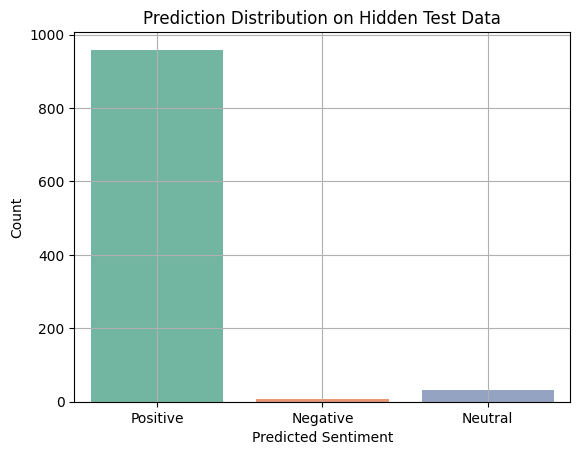

In [54]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Plot distribution of predicted sentiments
sns.countplot(x=output_df['predicted_sentiment'], palette='Set2')
plt.title("Prediction Distribution on Hidden Test Data")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Count")
plt.grid(True)
plt.show()


# 📁 2. Upload-ready Final CSV

In [56]:
output_df.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,clean_text,predicted_sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive,amazon kindle fire lot free app used one want ...,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive,echo show great addition amazon family work li...,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive,great value best buy bought christmas sale,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive,use mine email facebook game go line also load...,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive,fantastic item person bought love,Positive


🔧 Step-by-Step Setup for LSTM Tuning
We will tune:

embedding_dim

LSTM units

dropout

optimizer

learning_rate

In [42]:
# ✅ 1. Install Keras Tuner (if not installed)
!pip install keras-tuner --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.1 MB/s eta 0:00:00


✅ 2. Define a LSTM Model Builder for Keras Tuner

In [43]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define model builder
def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000,
                        output_dim=hp.Int('embedding_dim', 32, 128, step=32),
                        input_length=200))

    model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=False))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(3, activation='softmax'))  # 3 classes: positive, negative, neutral

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


✅ 3. Set Up Hyperband Search

In [44]:
from keras_tuner.tuners import Hyperband

tuner = Hyperband(
    build_lstm_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='lstm_tuning',
    project_name='sentiment_lstm'
)


✅ 4. Train With Tuning

In [45]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

tuner.search(X_train_seq, y_train, epochs=10, validation_split=0.2, callbacks=[early_stop])


Trial 30 Complete [00h 00m 08s]
val_accuracy: 0.9296875

Best val_accuracy So Far: 0.9375
Total elapsed time: 00h 03m 19s


✅ 5. Get the Best Model

In [55]:
best_lstm_model = tuner.get_best_models(num_models=1)[0]

# Evaluate it
loss, accuracy = best_lstm_model.evaluate(X_hidden)
print(f"Best LSTM Model Accuracy on Test Set: {accuracy:.4f}")


ValueError: None values not supported.

 # ✅Predict and Evaluate

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_val_pred = best_lstm_model.predict(X_val_seq)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val_seq, axis=1)

print(classification_report(y_val_true, y_val_pred_classes))
